## Description
This jupyter notebook file is a code to add previous sharp images and next sharp images to "GoPro with SCER dataset" (.h5 file) used in EFNet and to save it as a new .h5 file.<br/>
The added previous and next sharp images will be used to generate pseudo GT optical flow during the runtime of the train code.

## Preparation
Download link for GOPRO original dataset: https://seungjunnah.github.io/Datasets/gopro.html <br/>
Download link for GoPro with SCER used in EFNet: https://data.vision.ee.ethz.ch/csakarid/shared/EFNet/GOPRO.zip


# Step 1

## Collect only sharp images from the GoPro original dataset into a single directory.
Expected target directory tree is below<br/>
---GoPro_sharp<br/>
&emsp;|---train<br/>
&emsp;&emsp;|---GOPR0372_07_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0372_07_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0372_07_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0372_07_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0374_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0374_11_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0374_11_02_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0374_11_03_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0378_13_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0379_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0380_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0384_11_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0384_11_02_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0384_11_03_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0384_11_04_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0385_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0386_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0477_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0857_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0868_11_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0868_11_02_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0871_11_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0881_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0884_11_00_xxxxxx.png<br/>
&emsp;&emsp;|--- ...<br/>
&emsp;|---test<br/>
&emsp;&emsp;|---GOPR0384_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0384_11_05_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0385_11_01_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0396_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0410_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0854_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0862_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0868_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0869_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0871_11_00_xxxxxx.png<br/>
&emsp;&emsp;|---GOPR0881_11_01_xxxxxx.png<br/>
&emsp;&emsp;|--- ...<br/>


In [3]:
import os
import shutil

# Test set 먼저 작업
# GoPro 원본 디렉토리와 대상 디렉토리 경로 설정
source_base_directory = '/data1/ohjinjin/nas_ohjinjin/GoPro_original/test/'
target_directory = '/data1/ohjinjin/nas_ohjinjin/GoPro_sharp/test'

# source_base_directory 내의 모든 하위 디렉토리에 대해 반복
for scene in os.listdir(source_base_directory):
    print(scene)
    source_directory = os.path.join(source_base_directory, scene, 'sharp')
    # 해당 하위 디렉토리의 sharp 폴더가 있는지 확인
    if os.path.exists(source_directory):
        # 해당 하위 디렉토리의 모든 .png 파일을 대상 디렉토리로 복사
        for file in os.listdir(source_directory):
            if file.endswith('.png'):
                source_file_path = os.path.join(source_directory, file)
                target_file_path = os.path.join(target_directory, scene+'_'+file)
#                 print("1:", source_file_path)
#                 print("2:", target_file_path)
                shutil.copyfile(source_file_path, target_file_path)


GOPR0384_11_00
GOPR0384_11_05
GOPR0385_11_01
GOPR0396_11_00
GOPR0410_11_00
GOPR0854_11_00
GOPR0862_11_00
GOPR0868_11_00
GOPR0869_11_00
GOPR0871_11_00
GOPR0881_11_01


In [15]:
# Train set 작업
# GoPro 원본 디렉토리와 대상 디렉토리 경로 설정
source_base_directory = '/data1/ohjinjin/nas_ohjinjin/GoPro_original/train/'
target_directory = '/data1/ohjinjin/nas_ohjinjin/GoPro_sharp/train'

# source_base_directory 내의 모든 하위 디렉토리에 대해 반복
for scene in os.listdir(source_base_directory):
    print(scene)
    source_directory = os.path.join(source_base_directory, scene, 'sharp')
    # 해당 하위 디렉토리의 sharp 폴더가 있는지 확인
    if os.path.exists(source_directory):
        # 해당 하위 디렉토리의 모든 .png 파일을 대상 디렉토리로 복사
        for file in os.listdir(source_directory):
            if file.endswith('.png'):
                source_file_path = os.path.join(source_directory, file)
                target_file_path = os.path.join(target_directory, scene+'_'+file)
#                 print("1:", source_file_path)
#                 print("2:", target_file_path)
                shutil.copyfile(source_file_path, target_file_path)


GOPR0372_07_00
GOPR0372_07_01
GOPR0374_11_00
GOPR0374_11_01
GOPR0374_11_02
GOPR0374_11_03
GOPR0378_13_00
GOPR0379_11_00
GOPR0380_11_00
GOPR0384_11_01
GOPR0384_11_02
GOPR0384_11_03
GOPR0384_11_04
GOPR0385_11_00
GOPR0386_11_00
GOPR0477_11_00
GOPR0857_11_00
GOPR0868_11_01
GOPR0868_11_02
GOPR0871_11_01
GOPR0881_11_00
GOPR0884_11_00


## Generate train and test datasets (.h5) for experiments using ground true optical flow.
#### Specifically we will concatenate the (temporally) previous and the next optical flows with event representation, and inject this concatenated tensor and a single blurry image tensor together into EFNet as an input.
#### The previous and the next sharp images will be used for obtaining ground true optical flow by using RAFT at runtime.

In [44]:
# import os
import numpy as np
import h5py
from PIL import Image

# sharp image만 모아둔 디렉토리
img_directory = f'/data1/ohjinjin/nas_ohjinjin/GoPro_sharp/test'
# EFNet에서 사용했던 h5 확장자의 GoPro with SCER dataset이 저장된 디렉토리
h5_directory = '/data1/ohjinjin/nas_ohjinjin/GOPRO_EFNet_original/GOPRO/test'
# sharp image 두장씩 추가된 새로운 h5을 저장할 디렉토리
output_h5_directory = '/data1/ohjinjin/nas_ohjinjin/GOPRO_EFNet_jinjin/GOPRO_bi/test'
if not os.path.exists(output_h5_directory):
    os.makedirs(output_h5_directory)


# scene 별로 저장된 원본 .h5 file의 내용을 그대로 먼저 복사한 후 prev와 next 이미지도 추가해준뒤 새 .h5로 저장해주는 함수
def process_files2(img_directory, h5_directory):
    files = [f for f in os.listdir(img_directory) if f.endswith('.png')]
    scene_dict = {}

    # scene별로 sharp image 파일들 분류
    for file in files:
#         print(f'Curr file: {file}')
        scene = '_'.join(file.split('_')[:3])  # 예: 'GOPR0384_11_00'
        if scene not in scene_dict:
            scene_dict[scene] = []
        scene_dict[scene].append(file)

    for scene, filenames in scene_dict.items():
        print(f"Current scene is {scene}")
        filenames.sort()

        old_h5_file_path = os.path.join(h5_directory, scene+".h5")
        new_h5_file_path = os.path.join(output_h5_directory, scene+".h5")
        with h5py.File(old_h5_file_path, 'r') as old_file:
            with h5py.File(new_h5_file_path, 'w') as new_file:
                for group in old_file.keys():
#                     print(f'COPY GROUPs\n current group: {group}')
                    old_file.copy(group, new_file)
#                 print("Contents:", list(new_file.keys()))
                if 'sharp_images_prev' not in new_file:
                    prev_group = new_file.create_group('sharp_images_prev')
                else:
                    prev_group = new_file['sharp_images_prev']
                    
                if 'sharp_images_next' not in new_file:
                    next_group = new_file.create_group('sharp_images_next')
                else:
                    next_group = new_file['sharp_images_next']
                
                # scene마다 가장 처음과 가장 마지막 이미지는 사용할 수 없으므로 제외, EFNet에서 사용한 데이터도 그러함
                for index, filename in enumerate(filenames[1:-1], start=0):
                    prev_file_path = os.path.join(img_directory, scene + '_' + str(int(filename[-10:-4]) - 1).zfill(6)+'.png')
                    next_file_path = os.path.join(img_directory, scene + '_' + str(int(filename[-10:-4]) + 1).zfill(6)+'.png')

                    # 추가할 sharp image들 열어서 기존 h5파일에 이미지들 저장해둔 차원과 통일시켜주기
                    prev_data = np.transpose(np.array(Image.open(prev_file_path))[:, :, ::-1], (2,0,1))
                    next_data = np.transpose(np.array(Image.open(next_file_path))[:, :, ::-1], (2,0,1))

                    prev_group.create_dataset(f'image{str(index).zfill(9)}', data=prev_data)
                    next_group.create_dataset(f'image{str(index).zfill(9)}', data=next_data)

                    
# 파일 처리 시작
process_files2(img_directory, h5_directory)


Current scene is GOPR0384_11_00
Current scene is GOPR0384_11_05
Current scene is GOPR0385_11_01
Current scene is GOPR0396_11_00
Current scene is GOPR0410_11_00
Current scene is GOPR0854_11_00
Current scene is GOPR0862_11_00
Current scene is GOPR0868_11_00
Current scene is GOPR0869_11_00
Current scene is GOPR0871_11_00
Current scene is GOPR0881_11_01


Contents: ['images', 'masks', 'sharp_images', 'sharp_images_next', 'sharp_images_prev', 'voxels']
c1: ['image000000000', 'image000000001', 'image000000002', 'image000000003', 'image000000004', 'image000000005', 'image000000006', 'image000000007', 'image000000008', 'image000000009', 'image000000010', 'image000000011', 'image000000012', 'image000000013', 'image000000014', 'image000000015', 'image000000016', 'image000000017', 'image000000018', 'image000000019', 'image000000020', 'image000000021', 'image000000022', 'image000000023', 'image000000024', 'image000000025', 'image000000026', 'image000000027', 'image000000028', 'image000000029', 'image000000030', 'image000000031', 'image000000032', 'image000000033', 'image000000034', 'image000000035', 'image000000036', 'image000000037', 'image000000038', 'image000000039', 'image000000040', 'image000000041', 'image000000042', 'image000000043', 'image000000044', 'image000000045', 'image000000046', 'image000000047', 'image000000048', 'image000000049

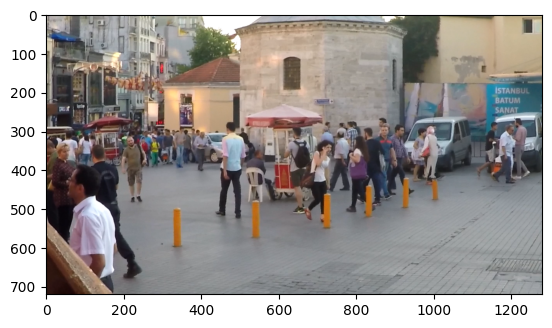

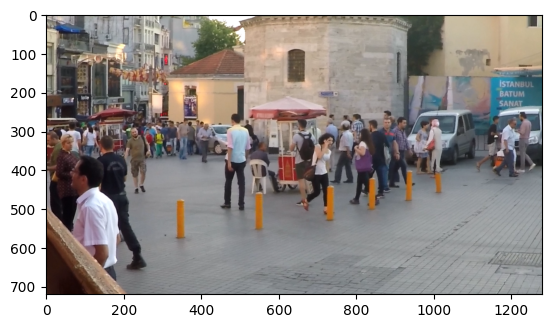

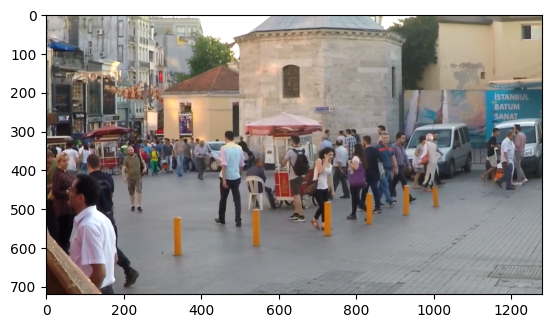

In [43]:
# 잘 저장되었는지 확인하기 위한 셀
import matplotlib.pyplot as plt
# import h5py
# import numpy as np
with h5py.File('/data1/ohjinjin/nas_ohjinjin/GOPRO_EFNet_jinjin/GOPRO_bi/test/GOPR0384_11_00.h5', 'r') as file:
    print("Contents:", list(file.keys()))
#     print("c0:", list(file['images'].keys()))
#     print("c0:", np.array(file['images/image000000000']))
#     print("c1:", list(file['masks'].keys()))
#     print("c1:", np.array(file['masks/mask000000001']).shape)
    print("c1:", list(file['sharp_images'].keys()))
    print("c2:", list(file['sharp_images_prev'].keys()))
    print("c2:", list(file['sharp_images_next'].keys()))
    
#     print("c2:", np.array(file['sharp_images/image000000001']).shape)
#     print("c3:", list(file['voxels'].keys()))
#     print("c3:", np.array(file['voxels/voxel000000001']).shape)
#     print("c4:", list(file['flows'].keys()))
#     print("c4:", np.array(file['flows/flow000000001']).shape)
    img = np.array(file['sharp_images/image000000000'])
    imgprev = np.array(file['sharp_images_prev/image000000000'])
    imgnext = np.array(file['sharp_images_next/image000000000'])
    plt.imshow(np.transpose(img,(1,2,0))[:, :, [2, 1, 0]])
    plt.show()
    plt.imshow(np.transpose(imgprev,(1,2,0))[:, :, [2, 1, 0]])
    plt.show()
    plt.imshow(np.transpose(imgnext,(1,2,0))[:, :, [2, 1, 0]])
    plt.show()
    
    

In [45]:
# test set 생성 완료되었으니 이번엔 train set 만들어주는 셀

# import os
# import numpy as np
# import h5py
# from PIL import Image

# sharp image만 모아둔 디렉토리
img_directory = f'/data1/ohjinjin/nas_ohjinjin/GoPro_sharp/train'
# EFNet에서 사용했던 h5 확장자의 GoPro with SCER dataset이 저장된 디렉토리
h5_directory = '/data1/ohjinjin/nas_ohjinjin/GOPRO_EFNet_original/GOPRO/train'
# sharp image 두장씩 추가된 새로운 h5을 저장할 디렉토리
output_h5_directory = '/data1/ohjinjin/nas_ohjinjin/GOPRO_EFNet_jinjin/GOPRO_bi/train'
if not os.path.exists(output_h5_directory):
    os.makedirs(output_h5_directory)

# # scene 별로 저장된 원본 .h5 file의 내용을 그대로 먼저 복사한 후 prev와 next 이미지도 추가해준뒤 새 .h5로 저장해주는 함수
# def process_files2(img_directory, h5_directory):
#     files = [f for f in os.listdir(img_directory) if f.endswith('.png')]
#     scene_dict = {}

#     # scene별로 파일 분류
#     for file in files:
# #         print(f'Curr file: {file}')
#         scene = '_'.join(file.split('_')[:3])  # 예: 'GOPR0384_11_00'
#         if scene not in scene_dict:
#             scene_dict[scene] = []
#         scene_dict[scene].append(file)

#     # 각 scene 내에서 파일 이름 변경
#     for scene, filenames in scene_dict.items():
#         print(f"Current scene is {scene}")
#         filenames.sort()  # 원래의 순서대로 정렬
# #         print("CHECK:::\n", filenames)
# #         print("CHECK:::\n", len(filenames))
# #         print("CHECK:::\n", len(filenames[1:]))
#         old_h5_file_path = os.path.join(h5_directory, scene+".h5")
#         new_h5_file_path = os.path.join(output_h5_directory, scene+".h5")
#         with h5py.File(old_h5_file_path, 'r') as old_file:
#             with h5py.File(new_h5_file_path, 'w') as new_file:
#                 for group in old_file.keys():
# #                     print(f'COPY GROUPs\n current group: {group}')
#                     old_file.copy(group, new_file)
# #                 print("Contents:", list(new_file.keys()))
#                 if 'sharp_images_prev' not in new_file:
#                     prev_group = new_file.create_group('sharp_images_prev')
#                 else:
#                     prev_group = new_file['sharp_images_prev']
                    
#                 if 'sharp_images_next' not in new_file:
#                     next_group = new_file.create_group('sharp_images_next')
#                 else:
#                     next_group = new_file['sharp_images_next']
                    
#                 for index, filename in enumerate(filenames[1:-1], start=0):
#                     prev_file_path = os.path.join(img_directory, scene + '_' + str(int(filename[-10:-4]) - 1).zfill(6)+'.png')
#                     next_file_path = os.path.join(img_directory, scene + '_' + str(int(filename[-10:-4]) + 1).zfill(6)+'.png')
# #                     print("flow_file: ", flo_file_path)
#                     prev_data = np.transpose(np.array(Image.open(prev_file_path))[:, :, ::-1], (2,0,1)) #np.transpose(img여는함수(prev_file_path), (2,0,1))
#                     next_data = np.transpose(np.array(Image.open(next_file_path))[:, :, ::-1], (2,0,1)) #np.transpose(img여는함수(next_file_path), (2,0,1))
# #                     print("CEHCL:", prev_data.shape)
# #                     print("CEHCL:", next_data.shape)
#                     prev_group.create_dataset(f'image{str(index).zfill(9)}', data=prev_data)
#                     next_group.create_dataset(f'image{str(index).zfill(9)}', data=next_data)
# #                     print(f'CHECK: flow{str(index).zfill(9)}')
# #                     print("flow_data.shape: ", flow_data.shape)
            
# #         break
# #             new_filename = f"{scene}_{str(index).zfill(6)}.flo"  # 예: 'GOPR0384_11_00_000001.flo'
# #             old_path = os.path.join(directory, filename)
# #             new_path = os.path.join(directory, new_filename)
# # #             os.rename(old_path, new_path)  # 파일 이름 변경
# #             print(f"Renamed {filename} to {new_filename}")

# 파일 처리 시작
process_files2(img_directory, h5_directory)


Current scene is GOPR0372_07_00
Current scene is GOPR0372_07_01
Current scene is GOPR0374_11_00
Current scene is GOPR0374_11_01
Current scene is GOPR0374_11_02
Current scene is GOPR0374_11_03
Current scene is GOPR0378_13_00
Current scene is GOPR0379_11_00
Current scene is GOPR0380_11_00
Current scene is GOPR0384_11_01
Current scene is GOPR0384_11_02
Current scene is GOPR0384_11_03
Current scene is GOPR0384_11_04
Current scene is GOPR0385_11_00
Current scene is GOPR0386_11_00
Current scene is GOPR0477_11_00
Current scene is GOPR0857_11_00
Current scene is GOPR0868_11_01
Current scene is GOPR0868_11_02
Current scene is GOPR0871_11_01
Current scene is GOPR0881_11_00
Current scene is GOPR0884_11_00
